# 0. Import and Functions

## 0.1 Import 

In [117]:
import inflection


import pandas  as pd 
import seaborn as sns 
import plotly  as plt 
import numpy   as np 

from IPython.core.display    import HTML 
from IPython.display         import Image

In [118]:
df_raw = pd.read_csv("datas/WA_Fn-UseC_-HR-Employee-Attrition.csv")

## 0.2 Functions

In [119]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

In [120]:
jupyter_settings() 

Populating the interactive namespace from numpy and matplotlib


C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1. Data Describe

In [121]:
df1 = df_raw.copy()

In [122]:
df1.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 1.1 Rename Columns

Explicação das colunas: 
<br>

* Age - Idade                         
* Attrition - Saída                 
* BusinessTravel - Viagem a Trabalho
* DailyRate - Diária                    
* Department - Departamento                  
* DistanceFromHome - Distância de Casa        
* Education - Educação
* EducationField - Campo de Educação     
* EmployeeCount  -  Contagem de Empregados
* EmployeeNumber -  Número de Empregado             
* EnvironmentSatisfaction - Satisfação da Empresa
* Gender - Gênero
* HourlyRate - Horas de Trabalho             
* JobInvolvement - Participação do Trbalho  
* JobLevel - Nível do Empregado                   
* JobRole  - Cargo                   
* JobSatisfaction - Satisfação do Trabalho            
* MaritalStatus   - Estado Civil
* MonthlyIncome   - Renda Mensal            
* MonthlyRate     - Taxa Mensal            
* NumCompaniesWorked  -  Número de Ex Empresas      
* Over18   -  Mais de 18 anos                   
* OverTime  - Ao longo do tempo                  
* PercentSalaryHike   - Percentual de Salário      
* PerformanceRating  - Avaliação de Desempenho     
* RelationshipSatisfaction   - Satisfação de Relacionamento    
* StandardHours - Horas Padrão              
* StockOptionLevel - Level das Ações           
* TotalWorkingYears - Anos trabalhados            
* TrainingTimesLastYear - Horas de Treinamento Ano Passado  
* WorkLifeBalance       - Equilíbrio Entre vida Pessoal   
* YearsAtCompany        - Anos de Empresa      
* YearsInCurrentRole    - Anos no mesmo cargo 
* YearsSinceLastPromotion - Anos desde a última promoção    
* YearsWithCurrManager    - Anos com gerente atual

In [123]:
cols_old = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.2 Data Dimensions

In [124]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1470
Number of Cols: 35


## 1.3 Data Types

In [125]:
df1.dtypes

age                            int64
attrition                     object
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_count                 int64
employee_number                int64
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over18                        object
over_time                     object
percent_salary_hike            int64
performance_rating             int64
relationship_satisfaction      int64
standard_hours                 int64
s

## 1.5 Change DataTypes

In [126]:
df1["job_satisfaction"].value_counts()

4    459
3    442
1    289
2    280
Name: job_satisfaction, dtype: int64

In [127]:
df1["job_satisfaction1"] = df1["job_satisfaction"].apply(lambda x: "ruim"  if x == 1 else 
                                                       "regular" if x == 2 else 
                                                        "bom" if x == 3 else 
                                                        "excelente")

df1["performance_rating1"] = df1["performance_rating"].apply(lambda x: "ruim"  if x == 1 else 
                                                       "regular" if x == 2 else 
                                                        "bom" if x == 3 else 
                                                        "excelente")


df1["environment_satisfaction1"] = df1["environment_satisfaction"].apply(lambda x: "ruim"  if x == 1 else 
                                                       "regular" if x == 2 else 
                                                        "bom" if x == 3 else 
                                                        "excelente")


## 1.6 Descriptive Statistics

In [128]:
num_attributes = df1.select_dtypes(exclude='object')
cat_attributes = df1.select_dtypes(include='object')

### 1.6.1 Numerical Atributes

In [129]:
num_attributes = num_attributes.drop(columns=['employee_number'], axis=1) 

describe = num_attributes.describe().T

describe['range'] = (num_attributes.max() - num_attributes.min()).tolist()
describe['variation coefficient'] = (num_attributes.std() / num_attributes.mean()).tolist()
describe['skew'] = num_attributes.skew().tolist()
describe['kurtosis'] = num_attributes.kurtosis().tolist()

describe

count          mean          std     min     25%      50%       75%      max  range  variation coefficient      skew  kurtosis
age                         1470.0     36.923810     9.135373    18.0    30.0     36.0     43.00     60.0     42               0.247411  0.413286 -0.404145
daily_rate                  1470.0    802.485714   403.509100   102.0   465.0    802.0   1157.00   1499.0   1397               0.502824 -0.003519 -1.203823
distance_from_home          1470.0      9.192517     8.106864     1.0     2.0      7.0     14.00     29.0     28               0.881898  0.958118 -0.224833
education                   1470.0      2.912925     1.024165     1.0     2.0      3.0      4.00      5.0      4               0.351593 -0.289681 -0.559115
employee_count              1470.0      1.000000     0.000000     1.0     1.0      1.0      1.00      1.0      0               0.000000  0.000000  0.000000
environment_satisfaction    1470.0      2.721769     1.093082     1.0     2.0      3.0      4.00      4.0      3               0.401607 -0.321654 -1.202521
hourly_rate                 1470.0     65.891156    20.329428    30.0    48.0     66.0     83.75    100.0     70               0.308530 -0.032311 -1.196398
job_involvement             1470.0      2.729932     0.711561     1.0     2.0      3.0      3.00      4.0      3               0.260652 -0.498419  0.270999
job_level                   1470.0      2.063946     1.106940     1.0     1.0      2.0      3.00      5.0      4               0.536322  1.025401  0.399152
job_satisfaction            1470.0      2.728571     1.102846     1.0     2.0      3.0      4.00      4.0      3               0.404184 -0.329672 -1.222193
monthly_income              1470.0   6502.931293  4707.956783  1009.0  2911.0   4919.0   8379.00  19999.0  18990               0.723975  1.369817  1.005233
monthly_rate                1470.0  14313.103401  7117.786044  2094.0  8047.0  14235.5  20461.50  26999.0  24905               0.497292  0.018578 -1.214956
num_companies_worked        1470.0      2.693197     2.498009     0.0     1.0      2.0      4.00      9.0      9               0.927525  1.026471  0.010214
percent_salary_hike         1470.0     15.209524     3.659938    11.0    12.0     14.0     18.00     25.0     14               0.240635  0.821128 -0.300598
performance_rating          1470.0      3.153741     0.360824     3.0     3.0      3.0      3.00      4.0      1               0.114411  1.921883  1.695939
relationship_satisfaction   1470.0      2.712245     1.081209     1.0     2.0      3.0      4.00      4.0      3               0.398640 -0.302828 -1.184814
standard_hours              1470.0     80.000000     0.000000    80.0    80.0     80.0     80.00     80.0      0               0.000000  0.000000  0.000000
stock_option_level          1470.0      0.793878     0.852077     0.0     0.0      1.0      1.00      3.0      3               1.073310  0.968980  0.364634
total_working_years         1470.0     11.279592     7.780782     0.0     6.0     10.0     15.00     40.0     40               0.689811  1.117172  0.918270
training_times_last_year    1470.0      2.799320     1.289271     0.0     2.0      3.0      3.00      6.0      6               0.460566  0.553124  0.494993
work_life_balance           1470.0      2.761224     0.706476     1.0     2.0      3.0      3.00      4.0      3               0.255856 -0.552480  0.419460
years_at_company            1470.0      7.008163     6.126525     0.0     3.0      5.0      9.00     40.0     40               0.874198  1.764529  3.935509
years_in_current_role       1470.0      4.229252     3.623137     0.0     2.0      3.0      7.00     18.0     18               0.856685  0.917363  0.477421
years_since_last_promotion  1470.0      2.187755     3.222430     0.0     0.0      1.0      3.00     15.0     15               1.472939  1.984290  3.612673
years_with_curr_manager     1470.0      4.123129     3.568136     0.0     2.0      3.0      7.00     17.0     17               0.

* ANÁLISE 

**nenhum dos nossos dados são homogêneos. nenhum tem variation coefficient menor do que 15%**

age (idade): <br>
+ em média: 37 anos. Com skew positivo - concentração de dados para valores mais baixos. 

distancefromhome: <br> 
+ skew positiva, concentração para pessoas morando mais perto. Em média 9 km, um pouco longe. 


total_working_years: <br>
+ em média temos funcionários com 11 anos trabalhados número interessante


num_companies_worked: <br>
+ em média os colaboradores trabalharam em 3 empresas, porém o nosso coeficiente é muito alto isso demonstra uma alta variação de dados. 

stock_option_level: <br>
+ alta variação de dados 

### 1.6.2 Categorical Atributes

In [130]:
cat_attributes

attrition    business_travel              department   education_field  gender                   job_role marital_status over18 over_time job_satisfaction1 performance_rating1 environment_satisfaction1
0          Yes      Travel_Rarely                   Sales     Life Sciences  Female            Sales Executive         Single      Y       Yes         excelente                 bom                   regular
1           No  Travel_Frequently  Research & Development     Life Sciences    Male         Research Scientist        Married      Y        No           regular           excelente                       bom
2          Yes      Travel_Rarely  Research & Development             Other    Male      Laboratory Technician         Single      Y       Yes               bom                 bom                 excelente
3           No  Travel_Frequently  Research & Development     Life Sciences  Female         Research Scientist        Married      Y       Yes               bom                 bom                 excelente
4           No      Travel_Rarely  Research & Development           Medical    Male      Laboratory Technician        Married      Y        No           regular                 bom                      ruim
5           No  Travel_Frequently  Research & Development     Life Sciences    Male      Laboratory Technician         Single      Y        No         excelente                 bom                 excelente
6           No      Travel_Rarely  Research & Development           Medical  Female      Laboratory Technician        Married      Y       Yes              ruim           excelente                       bom
7           No      Travel_Rarely  Research & Development     Life Sciences    Male      Laboratory Technician       Divorced      Y        No               bom           excelente                 excelente
8           No  Travel_Frequently  Research & Development     Life Sciences    Male     Manufacturing Director         Single      Y        No               bom           excelente                 excelente
9           No      Travel_Rarely  Research & Development           Medical    Male  Healthcare Representative        Married      Y        No               bom                 bom                       bom
10          No      Travel_Rarely  Research & Development           Medical    Male      Laboratory Technician        Married      Y        No           regular                 bom                      ruim
11          No      Travel_Rarely  Research & Development     Life Sciences  Female      Laboratory Technician         Single      Y       Yes               bom                 bom                 excelente
12          No      Travel_Rarely  Research & Development     Life Sciences    Male         Research Scientist       Divorced      Y        No               bom                 bom                      ruim
13          No      Travel_Rarely  Research & Development           Medical    Male      Laboratory Technician       Divorced      Y        No         excelente                 bom                   regular
14         Yes      Travel_Rarely  Research & Development     Life Sciences    Male      Laboratory Technician         Single      Y       Yes               bom                 bom                       bom
15          No      Travel_Rarely  Research & Development     Life Sciences  Female     Manufacturing Director       Divorced      Y        No              ruim                 bom                   regular
16          No      Travel_Rarely  Research & Development     Life Sciences    Male         Research Scientist       Divorced      Y       Yes           regular                 bom                      ruim
17          No         Non-Travel  Research & Development           Medical    Male      Laboratory Technician       Divorced      Y       Yes         excelente                 bom                 excelente
18          No      Travel_Rarely                   Sales     Life Scien

In [131]:
cat_attributes['job_satisfaction1'].value_counts(normalize=True) 

excelente    0.312245
bom          0.300680
ruim         0.196599
regular      0.190476
Name: job_satisfaction1, dtype: float64

In [132]:
df1

age attrition    business_travel  daily_rate              department  distance_from_home  education   education_field  employee_count  employee_number  environment_satisfaction  gender  hourly_rate  job_involvement  job_level                   job_role  job_satisfaction marital_status  monthly_income  monthly_rate  num_companies_worked over18 over_time  percent_salary_hike  performance_rating  relationship_satisfaction  standard_hours  stock_option_level  total_working_years  training_times_last_year  work_life_balance  years_at_company  years_in_current_role  years_since_last_promotion  years_with_curr_manager job_satisfaction1 performance_rating1 environment_satisfaction1
0      41       Yes      Travel_Rarely        1102                   Sales                   1          2     Life Sciences               1                1                         2  Female           94                3          2            Sales Executive                 4         Single            5993         19479                     8      Y       Yes                   11                   3                          1              80                   0                    8                         0                  1                 6                      4                           0                        5         excelente                 bom                   regular
1      49        No  Travel_Frequently         279  Research & Development                   8          1     Life Sciences               1                2                         3    Male           61                2          2         Research Scientist                 2        Married            5130         24907                     1      Y        No                   23                   4                          4              80                   1                   10                         3                  3                10                      7                           1                        7           regular           excelente                       bom
2      37       Yes      Travel_Rarely        1373  Research & Development                   2          2             Other               1                4                         4    Male           92                2          1      Laboratory Technician                 3         Single            2090          2396                     6      Y       Yes                   15                   3                          2              80                   0                    7                         3                  3                 0                      0                           0                        0               bom                 bom                 excelente
3      33        No  Travel_Frequently        1392  Research & Development                   3          4     Life Sciences               1                5                         4  Female           56                3          1         Research Scientist                 3        Married            2909         23159                     1      Y       Yes                   11                   3                          3              80                   0                    8                         3                  3                 8                      7                           3                        0               bom                 bom                 excelente
4      27        No      Travel_Rarely         591  Research & Development                   2          1           Medical               1                7                         1    Male           40                3          1      Laboratory Technician                 2        Married            3468         16632                     9      Y        No                   12                   3                          4              80                   1                    6                         3                  3                 2             

In [133]:
cat_attributes['environment_satisfaction1'].value_counts(normalize=True) 

bom          0.308163
excelente    0.303401
regular      0.195238
ruim         0.193197
Name: environment_satisfaction1, dtype: float64

In [134]:
cat_attributes['performance_rating1'].value_counts() 

bom          1244
excelente     226
Name: performance_rating1, dtype: int64

In [135]:
cat_attributes['attrition'].value_counts(normalize = True) 

No     0.838776
Yes    0.161224
Name: attrition, dtype: float64

In [136]:
cat_attributes['business_travel'].value_counts(normalize=True) 

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: business_travel, dtype: float64

In [137]:
cat_attributes['department'].value_counts(normalize=True) 

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: department, dtype: float64

In [138]:
cat_attributes['education_field'].value_counts() 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: education_field, dtype: int64

In [139]:
cat_attributes['gender'].value_counts() 

Male      882
Female    588
Name: gender, dtype: int64

In [140]:
cat_attributes['marital_status'].value_counts() 

Married     673
Single      470
Divorced    327
Name: marital_status, dtype: int64

In [141]:
cat_attributes['job_role'].value_counts() 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: job_role, dtype: int64

**INTEPRETAÇÃO** 
* job_satisfaction1 - temos maior concentração em bom e excelente 
* performance_rating1 -  não temos dados diferentes de bom e excelente 
* department - Research & Development é o maior concentração de 65% da amostra 
* business_travel - quase 70% viajam raramente 
* attrition - só temos 16% dos colaboradores desligados 

# 2.Feature Engineering e Hipóteses

In [142]:
df2 = df1.copy()

## 2.1 Mapa Mental para Hipóteses 

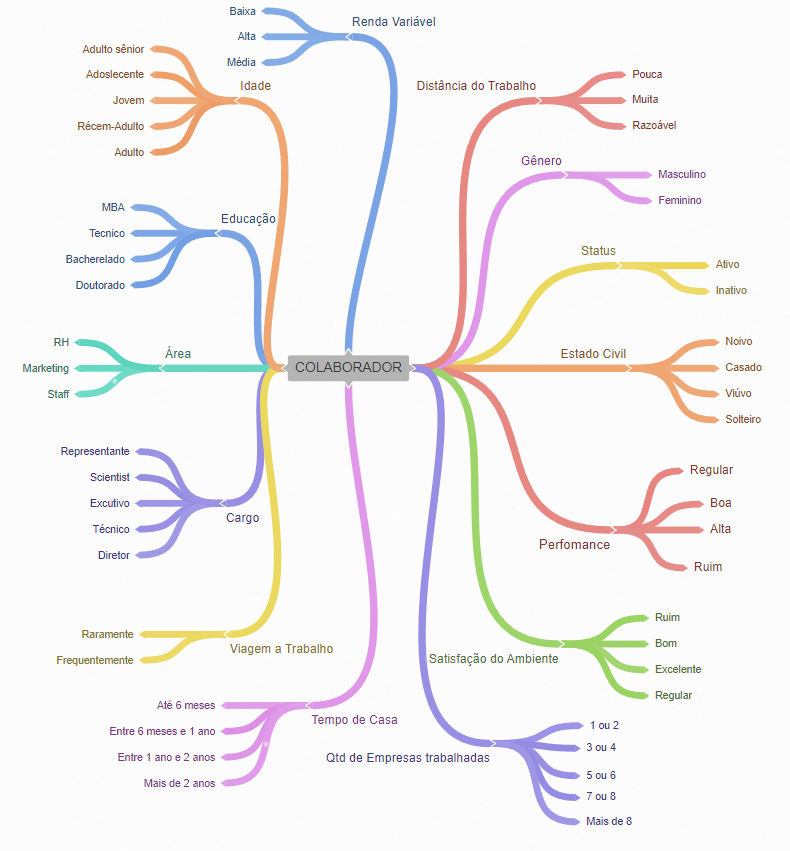

In [143]:
Image("datas/img.png") 

## 2.2 Criação das hipóteses

**IDADE**
1. Colaboradores mais jovem tem mais chance de sair da empresa do que o restante dos colaboradores 
2. Colaboradores idosos ganham o dobro dos colaboradores mais jovens 

**TEMPO DE CASA**
1. Os desligamentos de até 6 meses são menores do que os desligamentos de mais de 2 anos 

**SATISFAÇÃO DO AMBIENTE**
1. Colaboradores com satisfação de ambiente Ruim na sua maioria (50%>) saíram da empresa
2. Colaboradores com satisfação Excelente ganham mais stop option na sua maioria 

**JOB SATISFACTION**
1. Colaboradores com satisfação de trabalho Ruim na sua maioria (50%>) saíram da empresa
2. Viagem a trabalho muito frequentemente está ligado com "job satisfaction"

**EDUCAÇÃO**
1. A maioria dos desligamentos estão ligados a educação - MBA e Doutorado 

**CARGO**
1. Mais do que 50% dos desligamentos são de Técnico 

**GÊNERO**
1. Mais do que 50% dos diretores são homens 
2. Os desligamentos de mulheres são maiories do que os desligamentos de homens quando comparado com a quantidade de ativos de ambos 

**QTD DE EMPRESAS TRABALHADAS**
1. Colaboradores que trabalharam em mais de 5 até 8 empresas continuam mais ativos do que os colaboradores que trabalharam em 1 até 4. 

**PERFORMANCE**
1. Cargos executivo tem mais alta performance do que Técnicos 
2. Temos mais alta performance na empresa do que em desligados. 

**DISTÂNCIA DO TRABALHO**
1. Quando a distância é a maior possível temos maior desligamento do que quando a distância é a menor possível. 

**STOCK OPTION**
1. Nossos maiores desligamentos estão em funções que tem pouca % de stock option


## 2.3 Lista final das hipóteses 

1. Colaboradores mais jovem tem mais chance de sair da empresa do que o restante dos colaboradores
2. Colaboradores idosos ganham o dobro dos colaboradores mais jovens 
3. Os desligamentos de até 6 meses são menores do que os desligamentos de mais de 2 anos 
4. Colaboradores com satisfação de ambiente Ruim na sua maioria (50%>) saíram da empresa
5. Colaboradores com satisfação de trabalho Ruim na sua maioria (50%>) saíram da empresa
6. Viagem a trabalho muito frequentemente está ligado com "job satisfaction"
7. A maioria dos desligamentos estão ligados a educação - MBA e Doutorado
8. Mais do que 50% dos desligamentos são de Técnico
9. Mais do que 50% dos diretores são homens
10. Os desligamentos de mulheres são maiories do que os desligamentos de homens quando comparado com a quantidade de ativos de ambos 
11. Colaboradores que trabalharam em mais de 5 até 8 empresas continuam mais ativos do que os colaboradores que trabalharam em 1 até 4. 
12. Cargos executivo tem mais alta performance do que Técnicos 
13. Temos mais alta performance na empresa do que em desligados
14. Quando a distância é a maior possível temos maior desligamento do que quando a distância é a menor possível.
15. Nossos maiores desligamentos estão em funções que tem pouca % de stock option
16. Temos mais desligados em Staff do que em Marketing
17. Anos no mesmo cargo tem mais desligamentos do que colaboradores com menos anos 
18. Menos de 6 anos trabalhados tem mais desligamentos do que os com mais de 6 anos 

## 2.4 Feature Engineering

In [144]:
df2["age_range"] = df2["age"].apply(lambda x: "jovem" if x < 26 else 
                                              "adulto" if x < 45 else 
                                              "idoso")

df2["distance_range"]  = df2["distance_from_home"].apply(lambda x: "pouca" if x < 2 else 
                                                                   "media" if x < 7 else 
                                                                   "alta")

df2["empresas_range"] =  df2["num_companies_worked"].apply(lambda x: "1 - 3" if x < 4 else
                                                                     "4 - 7"  if x < 8 else
                                                                     "8 - 9")


df2["rv_range"] =  df2["stock_option_level"].apply(lambda x: "nao tem" if x ==  0 else
                                                              "pouca"  if x ==  1 else
                                                               "media" if x ==  2 else 
                                                               "alta")


# 3. Filtering Variables

In [145]:
df3 = df2.copy()

## 3.1 Filtering Lines

indiferente para nós 

## 3.2 Filetering Columns

In [146]:
df3 = df3.drop(columns=["employee_number","employee_count"], axis=1)

# 4. Exploratory Data Analysis

In [147]:
df4 = df3.copy()